## Datos geograficos

Vamos a trabajar con algunos datos geograficos, en este caso usaremos el dataset delitos_2021. Este contiene datos de delitos cometidos en la Ciudad de Buenos Aires, se pueden encontrar en la pagina oficial de datos de la Ciudad de Buenos Aires https://data.buenosaires.gob.ar/dataset/delitos.

Inspeccionemos el archivo

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import pandas as pd


delitos_2022 = pd.read_excel('delitos_2022.xlsx')
delitos_2023 = pd.read_excel('delitos_2023.xlsx')


In [3]:
delitos_2022.head(5)

id-mapa  anio        mes  dia      fecha  franja  tipo     subtipo  \
0        1  2022    octubre  VIE 2022-10-14     3.0  Robo  Robo total   
1        2  2022    octubre  JUE 2022-10-27     5.0  Robo  Robo total   
2        3  2022  noviembre  MAR 2022-11-29     0.0  Robo  Robo total   
3        4  2022  noviembre  LUN 2022-11-28     0.0  Robo  Robo total   
4        5  2022  noviembre  MIE 2022-11-30     3.0  Robo  Robo total   

  uso_arma uso_moto     barrio  comuna     latitud    longitud  cantidad  
0       NO       NO  CHACARITA    15.0 -34584136.0 -58454704.0         1  
1       NO       NO   BARRACAS     4.0 -34645043.0 -58373194.0         1  
2       NO       NO  CHACARITA    15.0 -34589982.0 -58446471.0         1  
3       NO       NO  CHACARITA    15.0  -3458832.0 -58441232.0         1  
4       NO       NO   RECOLETA     2.0 -34596748.0 -58413609.0         1

In [5]:
#¿Cuantas y cuales son las columnas del dataset?

delitos_2022.columns ##(para ver los nombres)
#  len(delitos_2022.columns) (para ver la cantidad)


Index(['id-mapa', 'anio', 'mes', 'dia', 'fecha', 'franja', 'tipo', 'subtipo',
       'uso_arma', 'uso_moto', 'barrio', 'comuna', 'latitud', 'longitud',
       'cantidad'],
      dtype='object')

In [6]:
#¿Cuantos valores en total hay en 2022 y en 2023?


print(delitos_2022.shape[0])

print(delitos_2023.shape[0])

140918
155897


In [7]:
#¿Cuantos y cuales tipos de delitos hay?
delitos_2022['tipo'].value_counts()

tipo
Robo          56334
Hurto         54304
Vialidad      10181
Lesiones      10153
Amenazas       9857
Homicidios       89
Name: count, dtype: int64

In [8]:
#¿Cuantos y cuales subtipos de delitos hay?
delitos_2022['subtipo'].value_counts()




subtipo
Robo total                        55581
Hurto total                       50255
Lesiones Dolosas                  10153
Lesiones por siniestros viales    10070
Amenazas                           9857
Hurto automotor                    4049
Robo automotor                      753
Muertes por siniestros viales       111
Homicidios dolosos                   84
Femicidios                            5
Name: count, dtype: int64

In [9]:
#¿Cuantos y cuales uso de arma hay?
delitos_2022['uso_arma'].value_counts()

uso_arma
NO    132252
SI      8666
Name: count, dtype: int64

In [10]:
#Veamos cuantos homicidios hubieron en 2022 y en 2023
homicidios_2022 = len(delitos_2022[delitos_2022['tipo'] == 'Homicidios'])

homicidios_2023 = len(delitos_2023[delitos_2023['tipo'] == 'Homicidios'])


print(homicidios_2022)
print(homicidios_2023)

89
91


In [11]:
#¿Podriamos cuantificar el aumento de homicidios del 2022 al 2023?

print((homicidios_2023 - homicidios_2022) / homicidios_2022 * 100)

2.247191011235955


In [12]:
#Veamos homicidios dolosos en 2022 en la comuna 1

homicidios_dolosos_2022_comuna1 = delitos_2022[(delitos_2022['subtipo'] == 'Homicidios dolosos') & (delitos_2022['comuna'] == 1.0)]

homicidios_dolosos_2022_comuna1.head()

id-mapa  anio        mes  dia      fecha  franja        tipo  \
120713   904841  2022       mayo  DOM 2022-05-22     1.0  Homicidios   
120714   904878  2022      marzo  MIE 2022-03-02     2.0  Homicidios   
120721   904947  2022  noviembre  MIE 2022-11-16     4.0  Homicidios   
120726   904988  2022      marzo  SAB 2022-03-05     5.0  Homicidios   
120727   905015  2022      enero  MAR 2022-01-25     6.0  Homicidios   

                   subtipo uso_arma uso_moto        barrio  comuna  \
120713  Homicidios dolosos       NO       NO     MONSERRAT     1.0   
120714  Homicidios dolosos       NO       NO     SAN TELMO     1.0   
120721  Homicidios dolosos       NO       NO  CONSTITUCION     1.0   
120726  Homicidios dolosos       NO       NO   SAN NICOLAS     1.0   
120727  Homicidios dolosos       NO       NO        RETIRO     1.0   

           latitud    longitud  cantidad  
120713 -34617789.0 -58384324.0         1  
120714 -34627161.0 -58369556.0         1  
120721 -34620997.0 -58382975.0         1  
120726 -34605325.0 -58390548.0         1  
120727 -34585789.0 -58378891.0         1

In [13]:
#Cuales son los Subtipos de vialidad?

print(delitos_2022[delitos_2022['tipo'] == 'Vialidad']['subtipo'].value_counts())
print('_____')
print(delitos_2022[delitos_2022['tipo'] == 'Homicidios']['subtipo'].value_counts())


subtipo
Lesiones por siniestros viales    10070
Muertes por siniestros viales       111
Name: count, dtype: int64
_____
subtipo
Homicidios dolosos    84
Femicidios             5
Name: count, dtype: int64


Queremos trabajar con datos geograficos pero los datos de latitud y longitud estan en otro formato y ademas hay datos faltantes que valen 0, es importante corregir o hacer algo con esto, el proximo modulo nos consentraremos en la limpieza y preparacion de datos, igualmente aqui vemos un ejemplo de como ir arreglando un dataset

In [14]:
#Corregimos el valor de latitud y longitud dividiendo hasta que quede bien
def normalizar_coord(valor):
    """
    Divide repetidamente entre 10 hasta que el valor tenga dos dígitos enteros.
    Respeta el signo original.
    """
    if pd.isna(valor):
        return None

    v = float(valor)
    signo = 1 if v >= 0 else -1
    v = abs(v)

    # dividir mientras la parte entera tenga más de 2 dígitos
    while int(v) >= 100:
        v /= 10

    return signo * v

delitos_2022['longitud']=delitos_2022['longitud'].apply(normalizar_coord)
delitos_2023['longitud']=delitos_2023['longitud'].apply(normalizar_coord)
delitos_2022['latitud']=delitos_2022['latitud'].apply(normalizar_coord)
delitos_2023['latitud']=delitos_2023['latitud'].apply(normalizar_coord)


#Transformamos el valor 0 a None
delitos_2022.replace(0, None,inplace=True)
delitos_2023.replace(0, None,inplace=True)

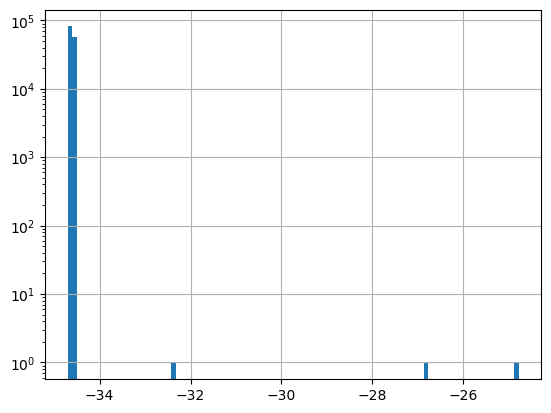

In [15]:
delitos_2022.latitud.hist(bins=100)
plt.yscale('log')

#Veamos los datos que estan mal
delitos_2022[delitos_2022.latitud>-34] #Son  3 amenazas decidimos borrarlas
delitos_2022=delitos_2022[delitos_2022.latitud<-34]


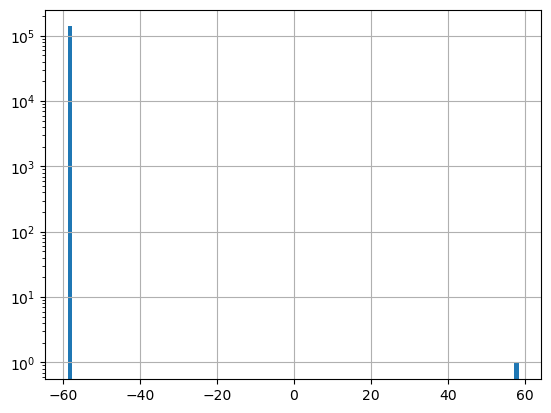

In [16]:
delitos_2022.longitud.hist(bins=100)
plt.yscale('log')

#parece estar mal el signo, lo corregimos
indice=delitos_2022[delitos_2022['longitud']>0].index
delitos_2022.loc[indice,'longitud']=delitos_2022.loc[indice,'longitud']*-1

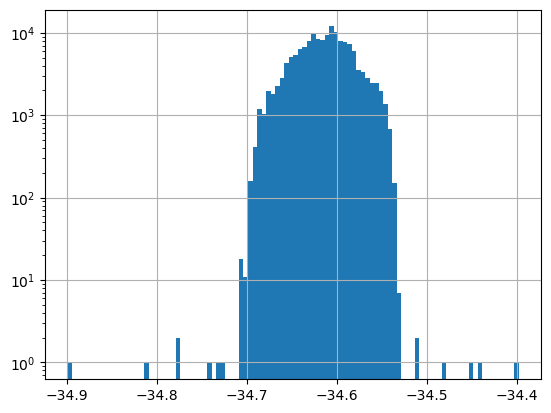

In [17]:
delitos_2023.latitud.hist(bins=100)
plt.yscale('log')


El archivo de los datos geoespaciales de CABA los podemos conseguir de [aquí](https://data.buenosaires.gob.ar/dataset/comunas/resource/Juqdkmgo-612222-resource). Para hacerlo más fácil, en la celda de abajo lo descargamos y descomprimimos desde python (sino, lo pueden hacer ustedes, solo necesitamos los archivos "comunas_wgs84.shp" y "comunas_wgs84.shx"). **Esto lo hace en el directorio actual en el que estamos ubicados**.

Ahora importamos el módulo (y matplotlib), y usamos los archivos que descargamos crear un `GeoDataFrame` y graficar el mapa de las comunas de CABA.

<Axes: >

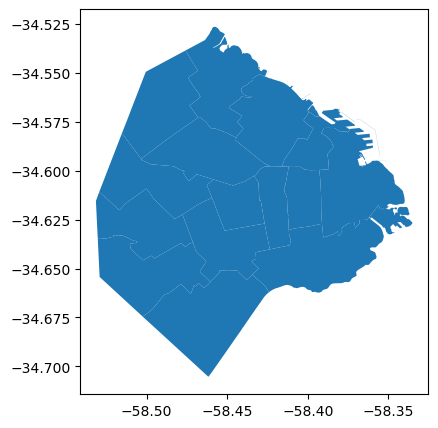

In [19]:
import geopandas as gpd
import matplotlib.pyplot as plt

# leer datos geoespaciales con GeoPandas, estos vienen en formato de shapefiles (.shp)
# Shapefiles: geospatial ArcGIS data have mandatory and optional files.
# mandatory file extensions for a shapefile are .shp, .shx and .dbf.
# optional files are: .prj, .xml, .sbn and .sbx
# https://gisgeography.com/arcgis-shapefile-files-types-extensions/
#
# # por ejemplo para CABA:
# https://data.buenosaires.gob.ar/dataset/comunas/resource/Juqdkmgo-612222-resource
# los archivos comunas_wgs84.shp y comunas_wgs84.shx ya están en el drive
comunas = gpd.read_file('comunas.shp')
# (aunque se especifique uno solo, GeoPandas busca tambien el .shx!!!)


fig, ax = plt.subplots(figsize=(5,5))
comunas.plot(ax=ax)

Que tal si ponemos un mapa de las calles de fondo mejor, usemos contextily OpenStreetMap para eso!

C:\Users\MATIAS\AppData\Local\Temp\ipykernel_9188\382409720.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(prop={'size': 12})


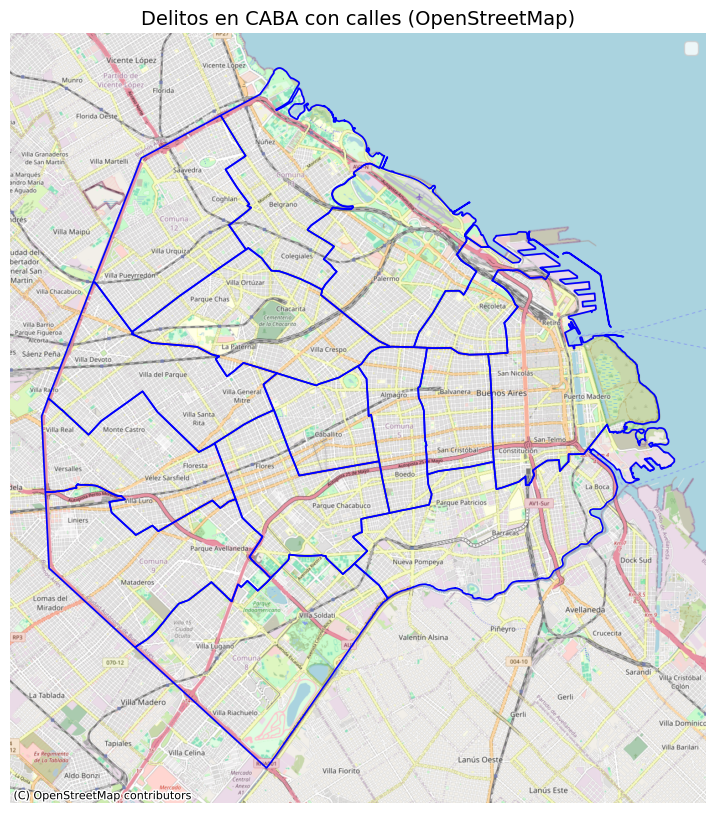

In [20]:
import contextily as ctx

# --- 1. Convertir GeoDataFrames al CRS de contextily (EPSG:3857) ---
comunas_3857 = comunas.to_crs(epsg=3857)

# --- 3. Crear figura y graficar ---
fig, ax = plt.subplots(figsize=(10,10))

# Comunas primero
comunas_3857.boundary.plot(ax=ax, color="blue", linewidth=1.2)

# --- 4. Agregar mapa base DEPUÉS de plotear los datos ---
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, zoom=13)

# --- 6. Estética ---
ax.set_axis_off()
plt.legend(prop={'size': 12})
plt.title("Delitos en CABA con calles (OpenStreetMap)", fontsize=14)
plt.show()



Ahora tratemos de ver los delitos del 2022 sobre este mapa

c:\Users\MATIAS\anaconda3\Lib\site-packages\pyproj\crs\crs.py:143: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


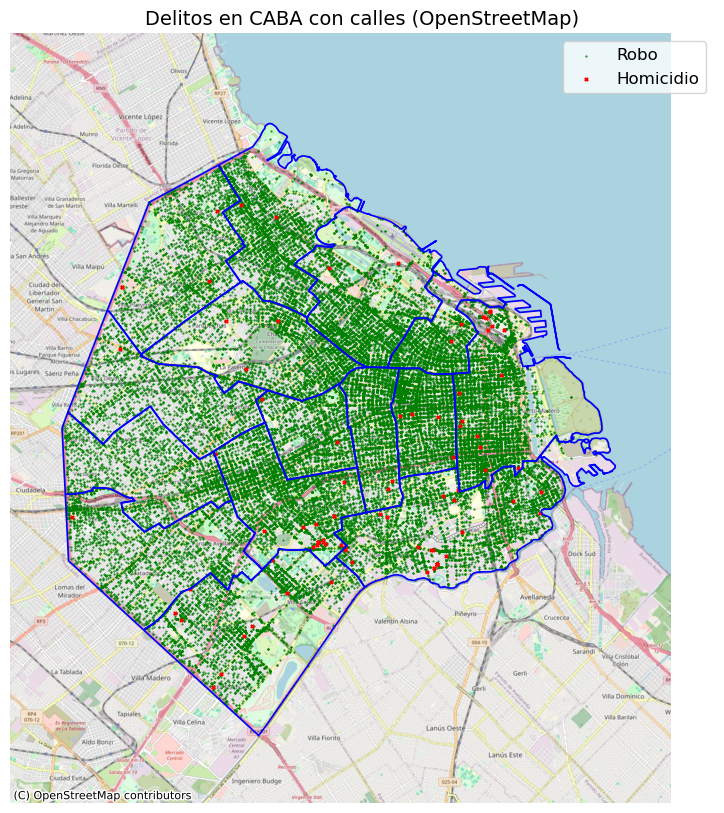

In [21]:
from shapely.geometry import Point, Polygon
from pyproj import Transformer
# specify our CRS (coordinate reference system)
# EPSG 4326 corresponde al sistema convencional WGS84
# empleado para la representación de la cartografía a nivel mundial
# https://epsg.io/4326
crs = {'init': 'epsg:4326'}

# Especificamos la geometria, convirtiendo longitud y latitud en shapely Points
geometry = [Point(xy) for xy in zip( delitos_2022["longitud"], delitos_2022["latitud"])]

# Creamos el GeoDataFrame
geo_df_2022 = gpd.GeoDataFrame(delitos_2022, crs = crs, geometry = geometry)

# --- 1. Convertir GeoDataFrames al CRS de contextily (EPSG:3857) ---
comunas_3857 = comunas.to_crs(epsg=3857)
geo_df_2022 = geo_df_2022.to_crs(epsg=3857)

# --- 2. Convertir tus límites de lon/lat a EPSG:3857 ---
transformer = Transformer.from_crs("epsg:4326", "epsg:3857", always_xy=True)
xmin, ymin = transformer.transform(-58.550, -34.725)
xmax, ymax = transformer.transform(-58.300, -34.500)

# --- 3. Crear figura y graficar ---
fig, ax = plt.subplots(figsize=(10,10))

# Comunas primero
comunas_3857.boundary.plot(ax=ax, color="blue", linewidth=1.2)

# Puntos de delitos
geo_df_2022[geo_df_2022["tipo"]=="Robo"].plot(ax=ax, markersize=1, color="green", marker=".", label="Robo")
geo_df_2022[geo_df_2022["tipo"]=="Homicidios"].plot(ax=ax, markersize=5, color="red", marker="x", label="Homicidio")

# --- 4. Agregar mapa base DEPUÉS de plotear los datos ---
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, zoom=13)

# --- 5. Ajustar límites ---
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

# --- 6. Estética ---
ax.set_axis_off()
plt.legend(prop={'size': 12})
plt.title("Delitos en CABA con calles (OpenStreetMap)", fontsize=14)
plt.show()



Ahora grafiquemos el mapa de homicidios en capital federal para 2022 y 2023

c:\Users\MATIAS\anaconda3\Lib\site-packages\pyproj\crs\crs.py:143: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
c:\Users\MATIAS\anaconda3\Lib\site-packages\pyproj\crs\crs.py:143: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


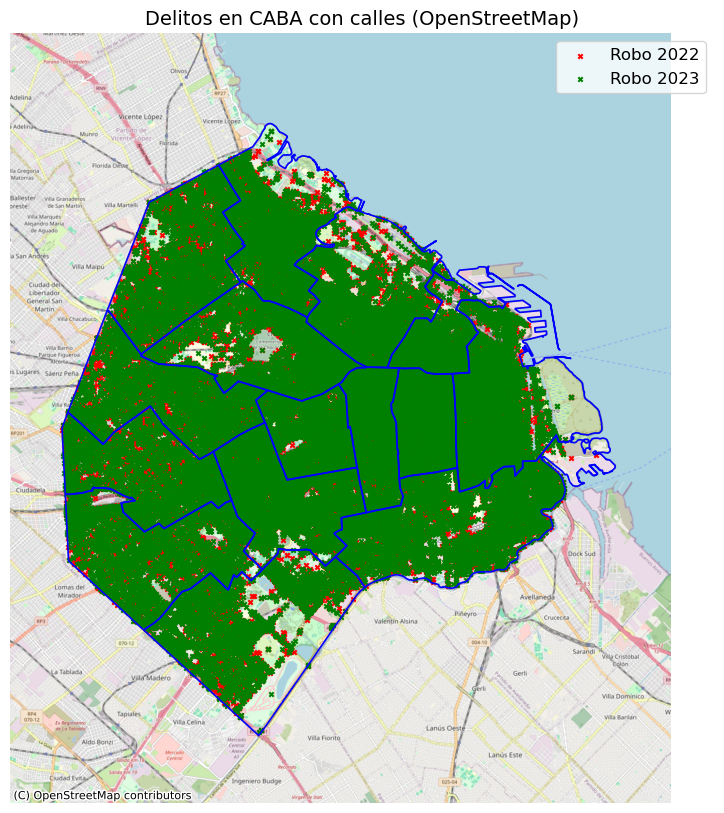

In [22]:
from shapely.geometry import Point, Polygon
from pyproj import Transformer
def safe_point(x, y):
    if pd.isna(x) or pd.isna(y):
        return None
    return Point(x, y)
# specify our CRS (coordinate reference system)
# EPSG 4326 corresponde al sistema convencional WGS84
# empleado para la representación de la cartografía a nivel mundial
# https://epsg.io/4326
crs = {'init': 'epsg:4326'}


# Creamos el GeoDataFrame
geometry = [safe_point(x, y) for x,y in zip( delitos_2022["longitud"], delitos_2022["latitud"])]
geo_df_2022 = gpd.GeoDataFrame(delitos_2022, crs = crs, geometry = geometry)
geometry = [safe_point(x, y) for x,y in zip( delitos_2023["longitud"], delitos_2023["latitud"])]
geo_df_2023 = gpd.GeoDataFrame(delitos_2023, crs = crs, geometry = geometry)

# --- 1. Convertir GeoDataFrames al CRS de contextily (EPSG:3857) ---
comunas_3857 = comunas.to_crs(epsg=3857)
geo_df_2022 = geo_df_2022.to_crs(epsg=3857)
geo_df_2023 = geo_df_2023.to_crs(epsg=3857)

# --- 2. Convertir tus límites de lon/lat a EPSG:3857 ---
transformer = Transformer.from_crs("epsg:4326", "epsg:3857", always_xy=True)
xmin, ymin = transformer.transform(-58.550, -34.725)
xmax, ymax = transformer.transform(-58.300, -34.500)

# --- 3. Crear figura y graficar ---
fig, ax = plt.subplots(figsize=(10,10))

# Comunas primero
comunas_3857.boundary.plot(ax=ax, color="blue", linewidth=1.2)

# Puntos de delitos
geo_df_2022[geo_df_2022["tipo"]=="Robo"].plot(ax=ax, markersize=10, color="red", marker="x", label="Robo 2022") ##
geo_df_2023[geo_df_2023["tipo"]=="Robo"].plot(ax=ax, markersize=10, color="green", marker="x", label="Robo 2023") ##

# --- 4. Agregar mapa base DEPUÉS de plotear los datos ---
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, zoom=13)

# --- 5. Ajustar límites ---
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

# --- 6. Estética ---
ax.set_axis_off()
plt.legend(prop={'size': 12})
plt.title("Delitos en CABA con calles (OpenStreetMap)", fontsize=14)
plt.show()


### -- Actividad

1) Grafique nuevamente la robos y homicidios del 2022 pero coloque una leyenda con el numero total de eventos de cada uno.

2) Grafique en otro Vialidad separando los dos subtipos para 2022.

3) Grafique los homicidios del 2022 y 2023 separando ahora en Femicidio y Homicidios dolosos, con dos colores distintos.

c:\Users\MATIAS\anaconda3\Lib\site-packages\pyproj\crs\crs.py:143: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


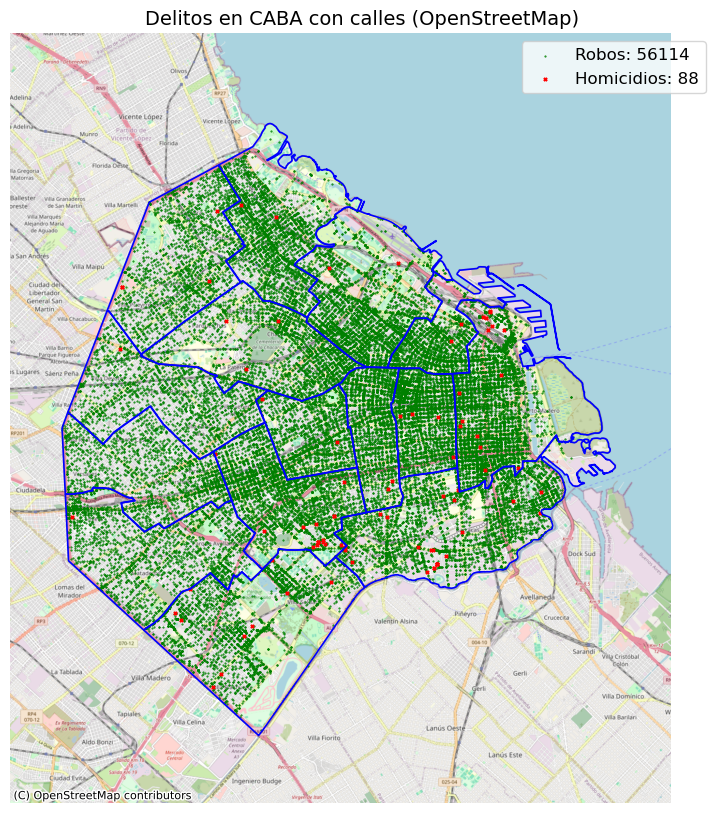

In [23]:
#1) Grafique nuevamente la robos y homicidios del 2022 pero coloque una leyenda con el numero total de eventos de cada uno.

from shapely.geometry import Point, Polygon
from pyproj import Transformer
# specify our CRS (coordinate reference system)
# EPSG 4326 corresponde al sistema convencional WGS84
# empleado para la representación de la cartografía a nivel mundial
# https://epsg.io/4326
crs = {'init': 'epsg:4326'}

# Especificamos la geometria, convirtiendo longitud y latitud en shapely Points
geometry = [Point(xy) for xy in zip( delitos_2022["longitud"], delitos_2022["latitud"])]

# Creamos el GeoDataFrame
geo_df_2022 = gpd.GeoDataFrame(delitos_2022, crs = crs, geometry = geometry)

# --- 1. Convertir GeoDataFrames al CRS de contextily (EPSG:3857) ---
comunas_3857 = comunas.to_crs(epsg=3857)
geo_df_2022 = geo_df_2022.to_crs(epsg=3857)

# --- 2. Convertir tus límites de lon/lat a EPSG:3857 ---
transformer = Transformer.from_crs("epsg:4326", "epsg:3857", always_xy=True)
xmin, ymin = transformer.transform(-58.550, -34.725)
xmax, ymax = transformer.transform(-58.300, -34.500)

# --- 3. Crear figura y graficar ---
fig, ax = plt.subplots(figsize=(10,10))

# Comunas primero
comunas_3857.boundary.plot(ax=ax, color="blue", linewidth=1.2)

# Puntos de delitos
geo_df_2022[geo_df_2022["tipo"]=="Robo"].plot(ax=ax, markersize=1, color="green", marker=".", label=f'Robos: {geo_df_2022[geo_df_2022["tipo"]=="Robo"].shape[0]}')
geo_df_2022[geo_df_2022["tipo"]=="Homicidios"].plot(ax=ax, markersize=5, color="red", marker="x", label=f'Homicidios: {geo_df_2022[geo_df_2022["tipo"]=="Homicidios"].shape[0]}')

# --- 4. Agregar mapa base DEPUÉS de plotear los datos ---
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, zoom=13)

# --- 5. Ajustar límites ---
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

# --- 6. Estética ---
ax.set_axis_off()
plt.legend(prop={'size': 12})
plt.title("Delitos en CABA con calles (OpenStreetMap)", fontsize=14)
plt.show()



c:\Users\MATIAS\anaconda3\Lib\site-packages\pyproj\crs\crs.py:143: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


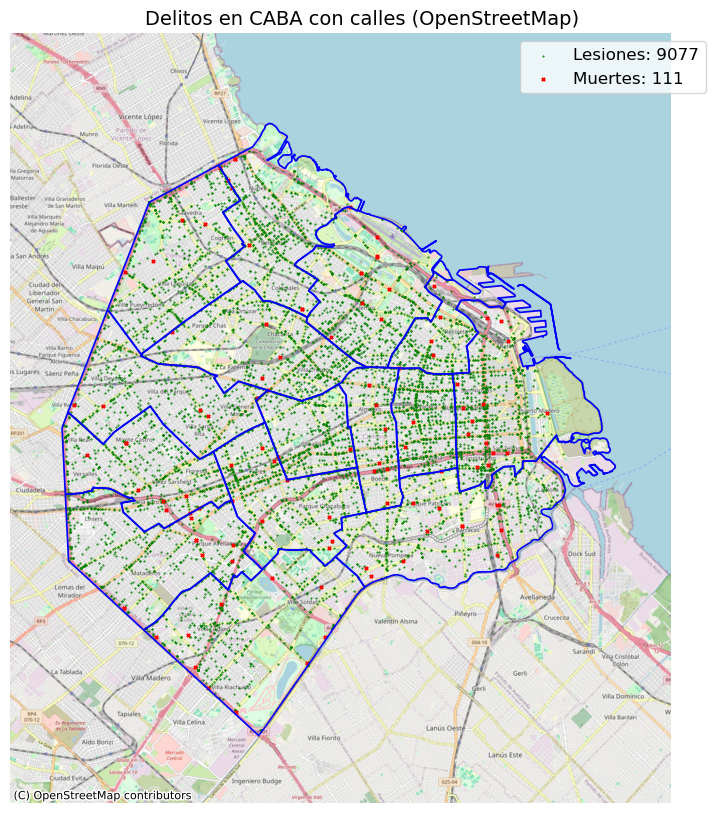

In [24]:
#2) Grafique en otro Vialidad separando los dos subtipos para 2022.

from shapely.geometry import Point, Polygon
from pyproj import Transformer
# specify our CRS (coordinate reference system)
# EPSG 4326 corresponde al sistema convencional WGS84
# empleado para la representación de la cartografía a nivel mundial
# https://epsg.io/4326
crs = {'init': 'epsg:4326'}

# Especificamos la geometria, convirtiendo longitud y latitud en shapely Points
geometry = [Point(xy) for xy in zip( delitos_2022["longitud"], delitos_2022["latitud"])]

# Creamos el GeoDataFrame
geo_df_2022 = gpd.GeoDataFrame(delitos_2022, crs = crs, geometry = geometry)

# --- 1. Convertir GeoDataFrames al CRS de contextily (EPSG:3857) ---
comunas_3857 = comunas.to_crs(epsg=3857)
geo_df_2022 = geo_df_2022.to_crs(epsg=3857)

# --- 2. Convertir tus límites de lon/lat a EPSG:3857 ---
transformer = Transformer.from_crs("epsg:4326", "epsg:3857", always_xy=True)
xmin, ymin = transformer.transform(-58.550, -34.725)
xmax, ymax = transformer.transform(-58.300, -34.500)

# --- 3. Crear figura y graficar ---
fig, ax = plt.subplots(figsize=(10,10))

# Comunas primero
comunas_3857.boundary.plot(ax=ax, color="blue", linewidth=1.2)

# Puntos de delitos
geo_df_2022[geo_df_2022["subtipo"]=="Lesiones por siniestros viales"].plot(ax=ax, markersize=1, color="green", marker=".", label=f'Lesiones: {geo_df_2022[geo_df_2022["subtipo"]=="Lesiones por siniestros viales"].shape[0]}')
geo_df_2022[geo_df_2022["subtipo"]=="Muertes por siniestros viales"].plot(ax=ax, markersize=5, color="red", marker="x", label=f'Muertes: {geo_df_2022[geo_df_2022["subtipo"]=="Muertes por siniestros viales"].shape[0]}')

# --- 4. Agregar mapa base DEPUÉS de plotear los datos ---
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, zoom=13)

# --- 5. Ajustar límites ---
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

# --- 6. Estética ---
ax.set_axis_off()
plt.legend(prop={'size': 12})
plt.title("Delitos en CABA con calles (OpenStreetMap)", fontsize=14)
plt.show()



c:\Users\MATIAS\anaconda3\Lib\site-packages\pyproj\crs\crs.py:143: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
c:\Users\MATIAS\anaconda3\Lib\site-packages\pyproj\crs\crs.py:143: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\MATIAS\AppData\Local\Temp\ipykernel_9188\2802875218.py:40: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  geo_df_2023[geo_df_2023["subtipo"]=="Femicidios"].plo

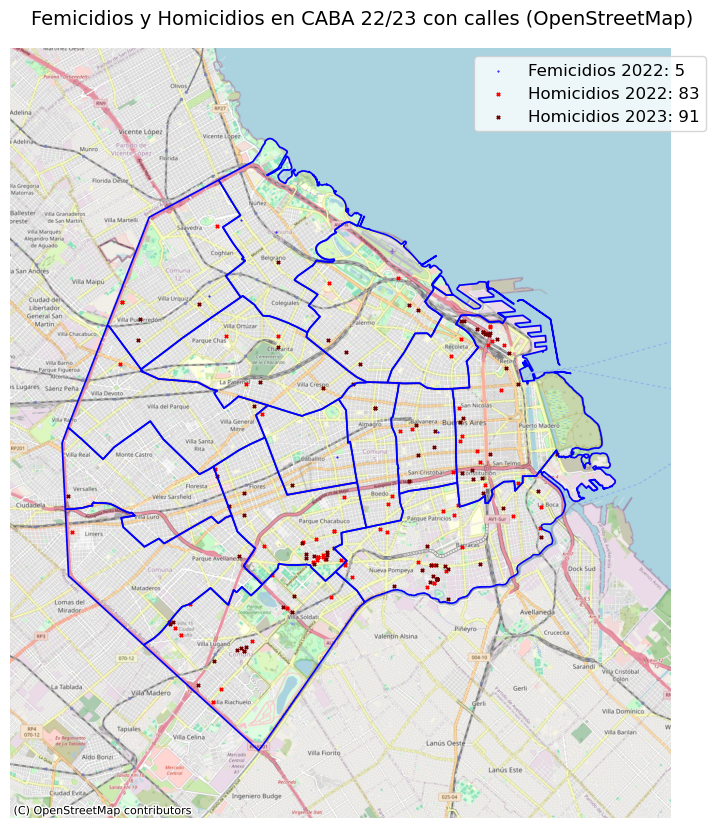

In [25]:
from shapely.geometry import Point, Polygon
from pyproj import Transformer
def safe_point(x, y):
    if pd.isna(x) or pd.isna(y):
        return None
    return Point(x, y)
# specify our CRS (coordinate reference system)
# EPSG 4326 corresponde al sistema convencional WGS84
# empleado para la representación de la cartografía a nivel mundial
# https://epsg.io/4326
crs = {'init': 'epsg:4326'}


# Creamos el GeoDataFrame
geometry = [safe_point(x, y) for x,y in zip( delitos_2022["longitud"], delitos_2022["latitud"])]
geo_df_2022 = gpd.GeoDataFrame(delitos_2022, crs = crs, geometry = geometry)
geometry = [safe_point(x, y) for x,y in zip( delitos_2023["longitud"], delitos_2023["latitud"])]
geo_df_2023 = gpd.GeoDataFrame(delitos_2023, crs = crs, geometry = geometry)

# --- 1. Convertir GeoDataFrames al CRS de contextily (EPSG:3857) ---
comunas_3857 = comunas.to_crs(epsg=3857)
geo_df_2022 = geo_df_2022.to_crs(epsg=3857)
geo_df_2023 = geo_df_2023.to_crs(epsg=3857)

# --- 2. Convertir tus límites de lon/lat a EPSG:3857 ---
transformer = Transformer.from_crs("epsg:4326", "epsg:3857", always_xy=True)
xmin, ymin = transformer.transform(-58.550, -34.725)
xmax, ymax = transformer.transform(-58.300, -34.500)

# --- 3. Crear figura y graficar ---
fig, ax = plt.subplots(figsize=(10,10))

# Comunas primero
comunas_3857.boundary.plot(ax=ax, color="blue", linewidth=1.2)

# Puntos de delitos
geo_df_2022[geo_df_2022["subtipo"]=="Femicidios"].plot(ax=ax, markersize=1, color="#0400ff", marker=".", label=f'Femicidios 2022: {geo_df_2022[geo_df_2022["subtipo"]=="Femicidios"].shape[0]}')
geo_df_2022[geo_df_2022["subtipo"]=="Homicidios dolosos"].plot(ax=ax, markersize=5, color="#FF0000", marker="x", label=f'Homicidios 2022: {geo_df_2022[geo_df_2022["subtipo"]=="Homicidios dolosos"].shape[0]}')

geo_df_2023[geo_df_2023["subtipo"]=="Femicidios"].plot(ax=ax, markersize=1, color="#08007e", marker=".", label=f'Femicidios 2023: {geo_df_2023[geo_df_2023["subtipo"]=="Femicidios"].shape[0]}')
geo_df_2023[geo_df_2023["subtipo"]=="Homicidios dolosos"].plot(ax=ax, markersize=5, color="#6D0000", marker="x", label=f'Homicidios 2023: {geo_df_2023[geo_df_2023["subtipo"]=="Homicidios dolosos"].shape[0]}')

# --- 4. Agregar mapa base DEPUÉS de plotear los datos ---
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, zoom=13)

# --- 5. Ajustar límites ---
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

# --- 6. Estética ---
ax.set_axis_off()
plt.legend(prop={'size': 12})
plt.title("Femicidios y Homicidios en CABA 22/23 con calles (OpenStreetMap)", fontsize=14)
plt.show()

#Clase 6

Ahora veamos el informe preliminar del delito 2023, traten como tarea, replicar alguno de los graficos o analisis, veran que ya son capases de realizar algo asi!

In [24]:
dolosos_2023 = delitos_2023[delitos_2023['tipo']=='Homicidios'] ##Filtramos por homicidios totales en 2023

len(dolosos_2023) #Cantidad de homicidios en 2023

dolosos_2023_4789 = dolosos_2023[dolosos_2023['comuna'].isin([4,7,8,9])] ##Filtramos por comunas 4,7,8,9

len(dolosos_2023_4789) #Cantidad de homicidios en 2023 en comunas 4,7,8,9 

#Para sacar el porcentaje de homicidios en comunas 4,7,8,9 respecto al total de homicidios en 2023
porcentaje_dolosos_4789 = (len(dolosos_2023_4789) / len(dolosos_2023)) * 100


print(f'El porcentaje de homicidios en comunas 4,7,8,9 respeto a el total de homicidios de 2023 es:', np.round(porcentaje_dolosos_4789,2))

El porcentaje de homicidios en comunas 4,7,8,9 respeto a el total de homicidios de 2023 es: 50.55


In [33]:
#Tasa de homicidios comuna 1
homicidios_comuna_1 = delitos_2023[(delitos_2023['tipo']=='Homicidios') & (delitos_2023['comuna']==1)]

len(homicidios_comuna_1)

#Tasa cada 100000 habitantes
tasa_homicidios_comuna_1 = (len(homicidios_comuna_1) / 223282) * 100000

print(f'La tasa de homicidios en la comuna 1 cada 100000 habitantes es: {np.round(tasa_homicidios_comuna_1,1)}')

La tasa de homicidios en la comuna 1 cada 100000 habitantes es: 9.4


### Planetas y el uso de escala logaritmica

Ahora vamos a trabajar con la distancia y los periodos orbitales de los planetas del sistema solar.


1) Plotear los períodos vs las distancias de los planetas como puntos y en una escala doble logarítmica (log X, log Y). Estan viendo la tercela ley de Keppler! $T^{2}\propto a^{3}$
2) Escribir el nombre del planeta cerca del punto correspondiente a ese planeta en el plot (puntos adicionales si el texto no se superpone y se lee claro, más puntos adicionales si usan flechas)
3) Trazar dos lineas punteadas (una vertical, una horizontal) que se crucen en el punto de la Tierra en el gráfico.

In [34]:
import numpy as np

# Distancia planeta-sol medido en terminos de la distancia tierra-sol (en millones de KM)
distancias = np.array([58.3,  107.7,  149.6,  227.4,  777.9, 1427.1, 2875.9, 4499.1])


#Periodo orbital en años
periodos = np.array([0.24, 0.62, 1.00, 1.88, 11.86, 29.46, 84.01, 164.8])

#Nombre de los planetas
planetas = ["Mercurio", "Venus", "Tierra", "Marte", "Jupiter", "Saturno", "Urano", "Neptuno"]

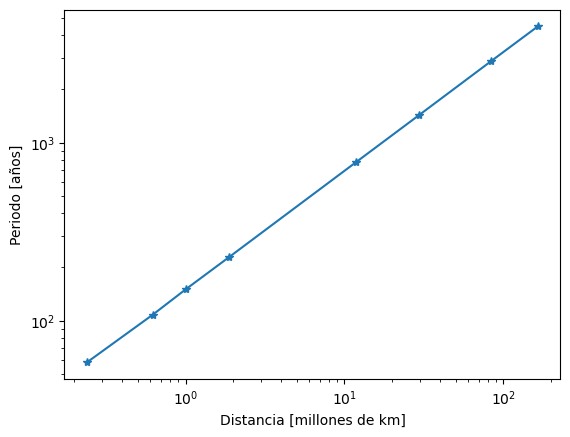

In [35]:
import matplotlib.pyplot as plt

plt.plot(periodos,distancias,'-*')
plt.ylabel('Periodo [años]')
plt.xlabel('Distancia [millones de km]')
plt.yscale('log')
plt.xscale('log')

# log(T^2) = 2*log(T)

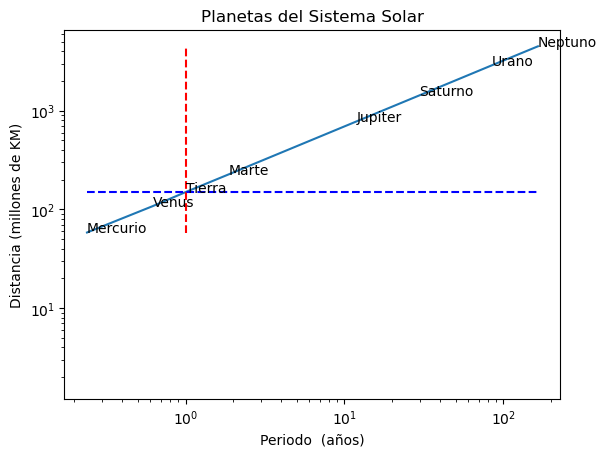

In [57]:
#Queremos poner los nombres de los planetas en cada punto y graficar
for i, planeta in enumerate(planetas):
    plt.text(periodos[i], distancias[i], planeta)

plt.plot(periodos, distancias)
plt.xlabel('Periodo  (años)')
plt.ylabel('Distancia (millones de KM)')
plt.title('Planetas del Sistema Solar')
plt.yscale('log')
plt.xscale('log')
plt.vlines(periodos[2], ymin=distancias[0], ymax=distancias[-1], colors='r', linestyles='dashed')
plt.hlines(distancias[2], xmin=periodos[0], xmax=periodos[-1], colors='b', linestyles='dashed')
plt.show()

## A seguir aplicando:

Ya hemos visto muchos tipos de graficos y aun existen muchos mas pero no son tan importantes como los que vimos hasta ahora. Asi que para ganar mas intuición y compreder cuando usar cada tipo de grafico, hagamos mas analisis de datasets.

### Casos COVID

Esta vez vamos a trabajar con los datos de los casos confirmados de Covid en la provincia de Santa Fe, que están en el archivo [`'casos_covid_confirmados_santafe.csv'`](https://drive.google.com/file/d/1DvshOSsVU34KdhCe1k85wyi-KVI9g6QS/view?usp=sharing). Los mismos fueron obtenidos reduciendo el dataset oficial de los casos de covid en todo el país.

1. Cargue los contenidos del csv en un DataFrame de Pandas y explore el dataset. En particular, pedimos reportar cuántos registros contiene y qué columnas tiene. ¿Cuáles son todos los valores posibles de la columna `"clasificacion"`?
2. Calcular cuánta gente de Santa Fe falleció por covid. ¿Qué porcentaje de los casos totales terminaron en muertes (o sea, cuál es la mortalidad)? Haga un grafico.
3. Calcule cuántos casos y muertes hubo en cada departamento de la provincia de Santa Fe. Haga un grafico.
4. Haga un histograma de edades de los casos confirmados. Ojo, hay que descartar primero los que tienen la edad contada en meses (mire la columna `"edad_años_meses"`). Haga también un segundo histograma de edades solo de los fallecidos. *(Sí, en el dataset hay alguien que figura que tiene 222 años... esos errores pasan. Se puede intentar filtrar esos casos para que no molesten en el histograma.)*
5. Haga el gráfico de casos diarios de covid. Para eso utilizá la columna `"fecha_apertura"`.


In [58]:
import pandas as pd

covid_df = pd.read_csv('casos_covid_confirmados_santafe.csv')

In [78]:
covid_df.head(5)

id_evento_caso sexo  edad edad_años_meses residencia_departamento_nombre  \
0        10000072    F  38.0            Años                    San Lorenzo   
1        10000269    F  35.0            Años                        Rosario   
2        10000345    M  23.0            Años                  General López   
3        10000379    M  35.0            Años                    San Lorenzo   
4        10000793    F  34.0            Años                        Rosario   

  fecha_apertura cuidado_intensivo fallecido fecha_fallecimiento  \
0     2021-04-08                NO        NO                 NaN   
1     2021-04-08                NO        NO                 NaN   
2     2021-04-08                NO        NO                 NaN   
3     2021-04-08                NO        NO                 NaN   
4     2021-04-08                NO        NO                 NaN   

                                       clasificacion  
0  Caso confirmado por laboratorio - No activo (p...  
1  Caso confirmado por laboratorio - No activo (p...  
2  Caso confirmado por laboratorio - No activo (p...  
3  Caso confirmado por laboratorio - No activo (p...  
4  Caso confirmado por laboratorio - No Activo po...

In [72]:
covid_df.columns ##Para ver las columnas

Index(['id_evento_caso', 'sexo', 'edad', 'edad_años_meses',
       'residencia_departamento_nombre', 'fecha_apertura', 'cuidado_intensivo',
       'fallecido', 'fecha_fallecimiento', 'clasificacion'],
      dtype='object')

In [76]:
## Para ver la cantidad de registros que tiene
covid_df.shape[0]

738172

In [84]:
#¿Cuáles son todos los valores posibles de la columna `"clasificacion"`?
covid_df['clasificacion'].value_counts() #o unique() aunque no nos muestra la cantidad de c/u

clasificacion
Caso confirmado por laboratorio - No activo (por tiempo de evolución)                        662340
Caso confirmado por criterio clínico-epidemiológico - No activo (por tiempo de evolución)     62814
Caso confirmado por laboratorio - Fallecido                                                    9190
Caso confirmado por laboratorio - No Activo por criterio de laboratorio                        2878
Caso confirmado por laboratorio - Activo                                                        323
Caso confirmado por criterio clínico-epidemiologico - Fallecido                                 204
Caso confirmado por laboratorio - Activo Internado                                              188
Caso confirmado por criterio clínico - epidemiológico -  Activo internado                       139
Caso confirmado por criterio clinico-epidemiológico - Activo                                     96
Name: count, dtype: int64

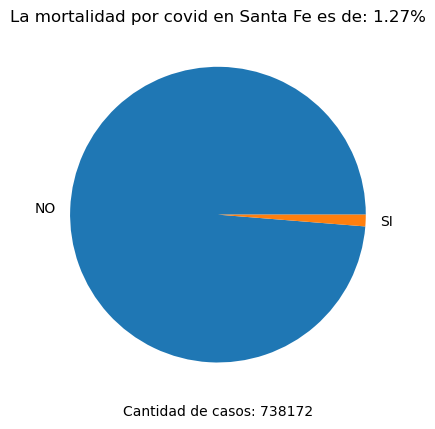

In [149]:
#Calcular cuánta gente de Santa Fe falleció por covid. ¿Qué porcentaje de los casos totales terminaron en muertes (o sea, cuál es la mortalidad)? Haga un grafico.
fallecidos = covid_df['fallecido'].value_counts()

cantidad_fallecidos = fallecidos.iloc[1]
porcentaje_fallecidos = (cantidad_fallecidos / covid_df.shape[0]) * 100

#print(f'La mortalidad por covid en Santa Fe es de: {np.round(porcentaje_fallecidos, 2)}%')

fallecidos.plot.pie().autopct='%1.1f%%'
plt.xlabel(f'Cantidad de casos: {covid_df.shape[0]}')
plt.ylabel('')
plt.title(f'La mortalidad por covid en Santa Fe es de: {np.round(porcentaje_fallecidos, 2)}%')
plt.show()

In [ ]:
#.size()

### Cambio climatico

Bajar los datos de temperaturas globales promedio del aire, de este sitio: https://raw.githubusercontent.com/sbu-python-summer/python-tutorial/master/day-4/nasa-giss.txt

(los datos son de la NASA: https://data.giss.nasa.gov/gistemp/graphs/)

Hay 3 columnas con datos: el año, el cambio de temperatura (No-smoothing = no suavizado), y una representación suavizada del cambio de temperatura (Lowess).

1) Leer estos datos usando Pandas – no son csv, son de ancho fijo (fwf),  Tip: ver pd.read_fwf()
2) Plotear la representación suavizada del cambio de temperatura como una línea
3) Plotear los datos de cambio de temperatura como puntos. Colorear los puntos en azul si son negativos (< 0) y rojos si son positivos (>=0).

In [ ]:
import pandas as pd

#Ayuda de carga de los datos
url = 'https://raw.githubusercontent.com/sbu-python-summer/python-tutorial/master/day-4/nasa-giss.txt'
# leemos el archivo directamente con pandas
# fwf = fixed-width format (columnas delimitadas por espaciamiento fijo)
df = pd.read_fwf(url, index_col=0, skiprows=8, header=None)   # index_col = 0 hace que tengamos dicha columna como índice
                                                              #skip_rows ignora ese número de filas antes de los datos
                                                              #header= None evita que use la primera fila de datos como nombres de las columnas

#Se puede renombrar las columnas
df.rename(columns={1: "Temperatura", 2: "Suavizado"}, inplace=True) #renombro las columnas en la misma variable con inplace=True
